In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from wordcloud import WordCloud, STOPWORDS

In [17]:
with open('/home/uzokmurod/Desktop/amaliyot/book recommendation sysrem/config/config.yaml', 'r') as file:
    config = yaml.safe_load(file)
    
raw_data = config['data']['url_books']
raw_tags = config['data']['url_tags']
raw_read = config['data']['url_read']
raw_tags_id = config['data']['url_tags_id']
raw_rating = config['data']['url_rating']

df = pd.read_csv(raw_data, index_col='id')
df_tags= pd.read_csv(raw_tags)
df_read = pd.read_csv(raw_read)
df_tagsid = pd.read_csv(raw_tags_id)
df_rating = pd.read_csv(raw_rating)


In [18]:
df_rating.shape

(981756, 3)

In [19]:
df_col = pd.DataFrame(df.columns)

In [20]:
df_col

0
0                     book_id
1                best_book_id
2                     work_id
3                 books_count
4                        isbn
5                      isbn13
6                     authors
7   original_publication_year
8              original_title
9                       title
10              language_code
11             average_rating
12              ratings_count
13         work_ratings_count
14    work_text_reviews_count
15                  ratings_1
16                  ratings_2
17                  ratings_3
18                  ratings_4
19                  ratings_5
20                  image_url
21            small_image_url

In [39]:
df_read.shape

(912705, 2)

In [21]:
df.head()

book_id  best_book_id  work_id  books_count       isbn        isbn13  \
id                                                                         
1   2767052       2767052  2792775          272  439023483  9.780439e+12   
2         3             3  4640799          491  439554934  9.780440e+12   
3     41865         41865  3212258          226  316015849  9.780316e+12   
4      2657          2657  3275794          487   61120081  9.780061e+12   
5      4671          4671   245494         1356  743273567  9.780743e+12   

                        authors  original_publication_year  \
id                                                           
1               Suzanne Collins                     2008.0   
2   J.K. Rowling, Mary GrandPré                     1997.0   
3               Stephenie Meyer                     2005.0   
4                    Harper Lee                     1960.0   
5           F. Scott Fitzgerald                     1925.0   

                              original_title  \
id                                             
1                           The Hunger Games   
2   Harry Potter and the Philosopher's Stone   
3                                   Twilight   
4                      To Kill a Mockingbird   
5                           The Great Gatsby   

                                                title  ... ratings_count  \
id                                                     ...                 
1             The Hunger Games (The Hunger Games, #1)  ...       4780653   
2   Harry Potter and the Sorcerer's Stone (Harry P...  ...       4602479   
3                             Twilight (Twilight, #1)  ...       3866839   
4                               To Kill a Mockingbird  ...       3198671   
5                                    The Great Gatsby  ...       2683664   

    work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
id                                                                      
1              4942365                   155254      66715     127936   
2              4800065                    75867      75504     101676   
3              3916824                    95009     456191     436802   
4              3340896                    72586      60427     117415   
5              2773745                    51992      86236     197621   

    ratings_3  ratings_4  ratings_5  \
id                                    
1      560092    1481305    2706317   
2      455024    1156318    3011543   
3      793319     875073    1355439   
4      446835    1001952    1714267   
5      606158     936012     947718   

                                            image_url  \
id                                                      
1   https://images.gr-assets.com/books/1447303603m...   
2   https://images.gr-assets.com/books/1474154022m...   
3   https://images.gr-assets.com/books/1361039443m...   
4   https://images.gr-assets.com/books/1361975680m...   
5   https://images.gr-assets.com/books/1490528560m...   

                                      small_image_url  
id                                                     
1   https://images.gr-assets.com/books/1447303603s...  
2   https://images.gr-assets.com/books/1474154022s...  
3   https://images.gr-assets.com/books/1361039443s...  
4   https://images.gr-assets.com/books/1361975680s...  
5   https://images.gr-assets.com/books/1490528560s...  

[5 rows x 22 columns]

In [40]:
df.describe()

book_id  best_book_id       work_id   books_count        isbn13  \
count  1.000000e+04  1.000000e+04  1.000000e+04  10000.000000  9.415000e+03   
mean   5.264697e+06  5.471214e+06  8.646183e+06     75.712700  9.755044e+12   
std    7.575462e+06  7.827330e+06  1.175106e+07    170.470728  4.428619e+11   
min    1.000000e+00  1.000000e+00  8.700000e+01      1.000000  1.951703e+08   
25%    4.627575e+04  4.791175e+04  1.008841e+06     23.000000  9.780316e+12   
50%    3.949655e+05  4.251235e+05  2.719524e+06     40.000000  9.780452e+12   
75%    9.382225e+06  9.636112e+06  1.451775e+07     67.000000  9.780831e+12   
max    3.328864e+07  3.553423e+07  5.639960e+07   3455.000000  9.790008e+12   

       original_publication_year  average_rating  ratings_count  \
count                9979.000000    10000.000000   1.000000e+04   
mean                 1981.987674        4.002191   5.400124e+04   
std                   152.576665        0.254427   1.573700e+05   
min                 -1750.000000        2.470000   2.716000e+03   
25%                  1990.000000        3.850000   1.356875e+04   
50%                  2004.000000        4.020000   2.115550e+04   
75%                  2011.000000        4.180000   4.105350e+04   
max                  2017.000000        4.820000   4.780653e+06   

       work_ratings_count  work_text_reviews_count      ratings_1  \
count        1.000000e+04             10000.000000   10000.000000   
mean         5.968732e+04              2919.955300    1345.040600   
std          1.678038e+05              6124.378132    6635.626263   
min          5.510000e+03                 3.000000      11.000000   
25%          1.543875e+04               694.000000     196.000000   
50%          2.383250e+04              1402.000000     391.000000   
75%          4.591500e+04              2744.250000     885.000000   
max          4.942365e+06            155254.000000  456191.000000   

           ratings_2      ratings_3     ratings_4     ratings_5  
count   10000.000000   10000.000000  1.000000e+04  1.000000e+04  
mean     3110.885000   11475.893800  1.996570e+04  2.378981e+04  
std      9717.123578   28546.449183  5.144736e+04  7.976889e+04  
min        30.000000     323.000000  7.500000e+02  7.540000e+02  
25%       656.000000    3112.000000  5.405750e+03  5.334000e+03  
50%      1163.000000    4894.000000  8.269500e+03  8.836000e+03  
75%      2353.250000    9287.000000  1.602350e+04  1.730450e+04  
max    436802.000000  793319.000000  1.481305e+06  3.011543e+06

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   best_book_id               10000 non-null  int64  
 2   work_id                    10000 non-null  int64  
 3   books_count                10000 non-null  int64  
 4   isbn                       9300 non-null   object 
 5   isbn13                     9415 non-null   float64
 6   authors                    10000 non-null  object 
 7   original_publication_year  9979 non-null   float64
 8   original_title             9415 non-null   object 
 9   title                      10000 non-null  object 
 10  language_code              8916 non-null   object 
 11  average_rating             10000 non-null  float64
 12  ratings_count              10000 non-null  int64  
 13  work_ratings_count         10000 non-null  int64  


In [23]:
titles = " ".join(x for x in df.title.astype(str))
titles

'The Hunger Games (The Hunger Games, #1) Harry Potter and the Sorcerer\'s Stone (Harry Potter, #1) Twilight (Twilight, #1) To Kill a Mockingbird The Great Gatsby The Fault in Our Stars The Hobbit The Catcher in the Rye Angels & Demons  (Robert Langdon, #1) Pride and Prejudice The Kite Runner Divergent (Divergent, #1) 1984 Animal Farm The Diary of a Young Girl The Girl with the Dragon Tattoo (Millennium, #1) Catching Fire (The Hunger Games, #2) Harry Potter and the Prisoner of Azkaban (Harry Potter, #3) The Fellowship of the Ring (The Lord of the Rings, #1) Mockingjay (The Hunger Games, #3) Harry Potter and the Order of the Phoenix (Harry Potter, #5) The Lovely Bones Harry Potter and the Chamber of Secrets (Harry Potter, #2) Harry Potter and the Goblet of Fire (Harry Potter, #4) Harry Potter and the Deathly Hallows (Harry Potter, #7) The Da Vinci Code (Robert Langdon, #2) Harry Potter and the Half-Blood Prince (Harry Potter, #6) Lord of the Flies Romeo and Juliet Gone Girl The Help Of M

In [24]:
stopwords = set(STOPWORDS)


In [34]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=900, height=500)

In [36]:
wordcloud.generate(titles)

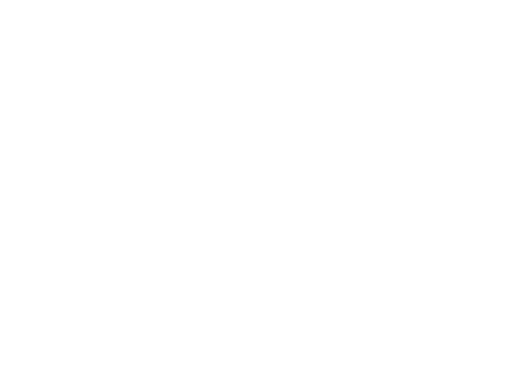

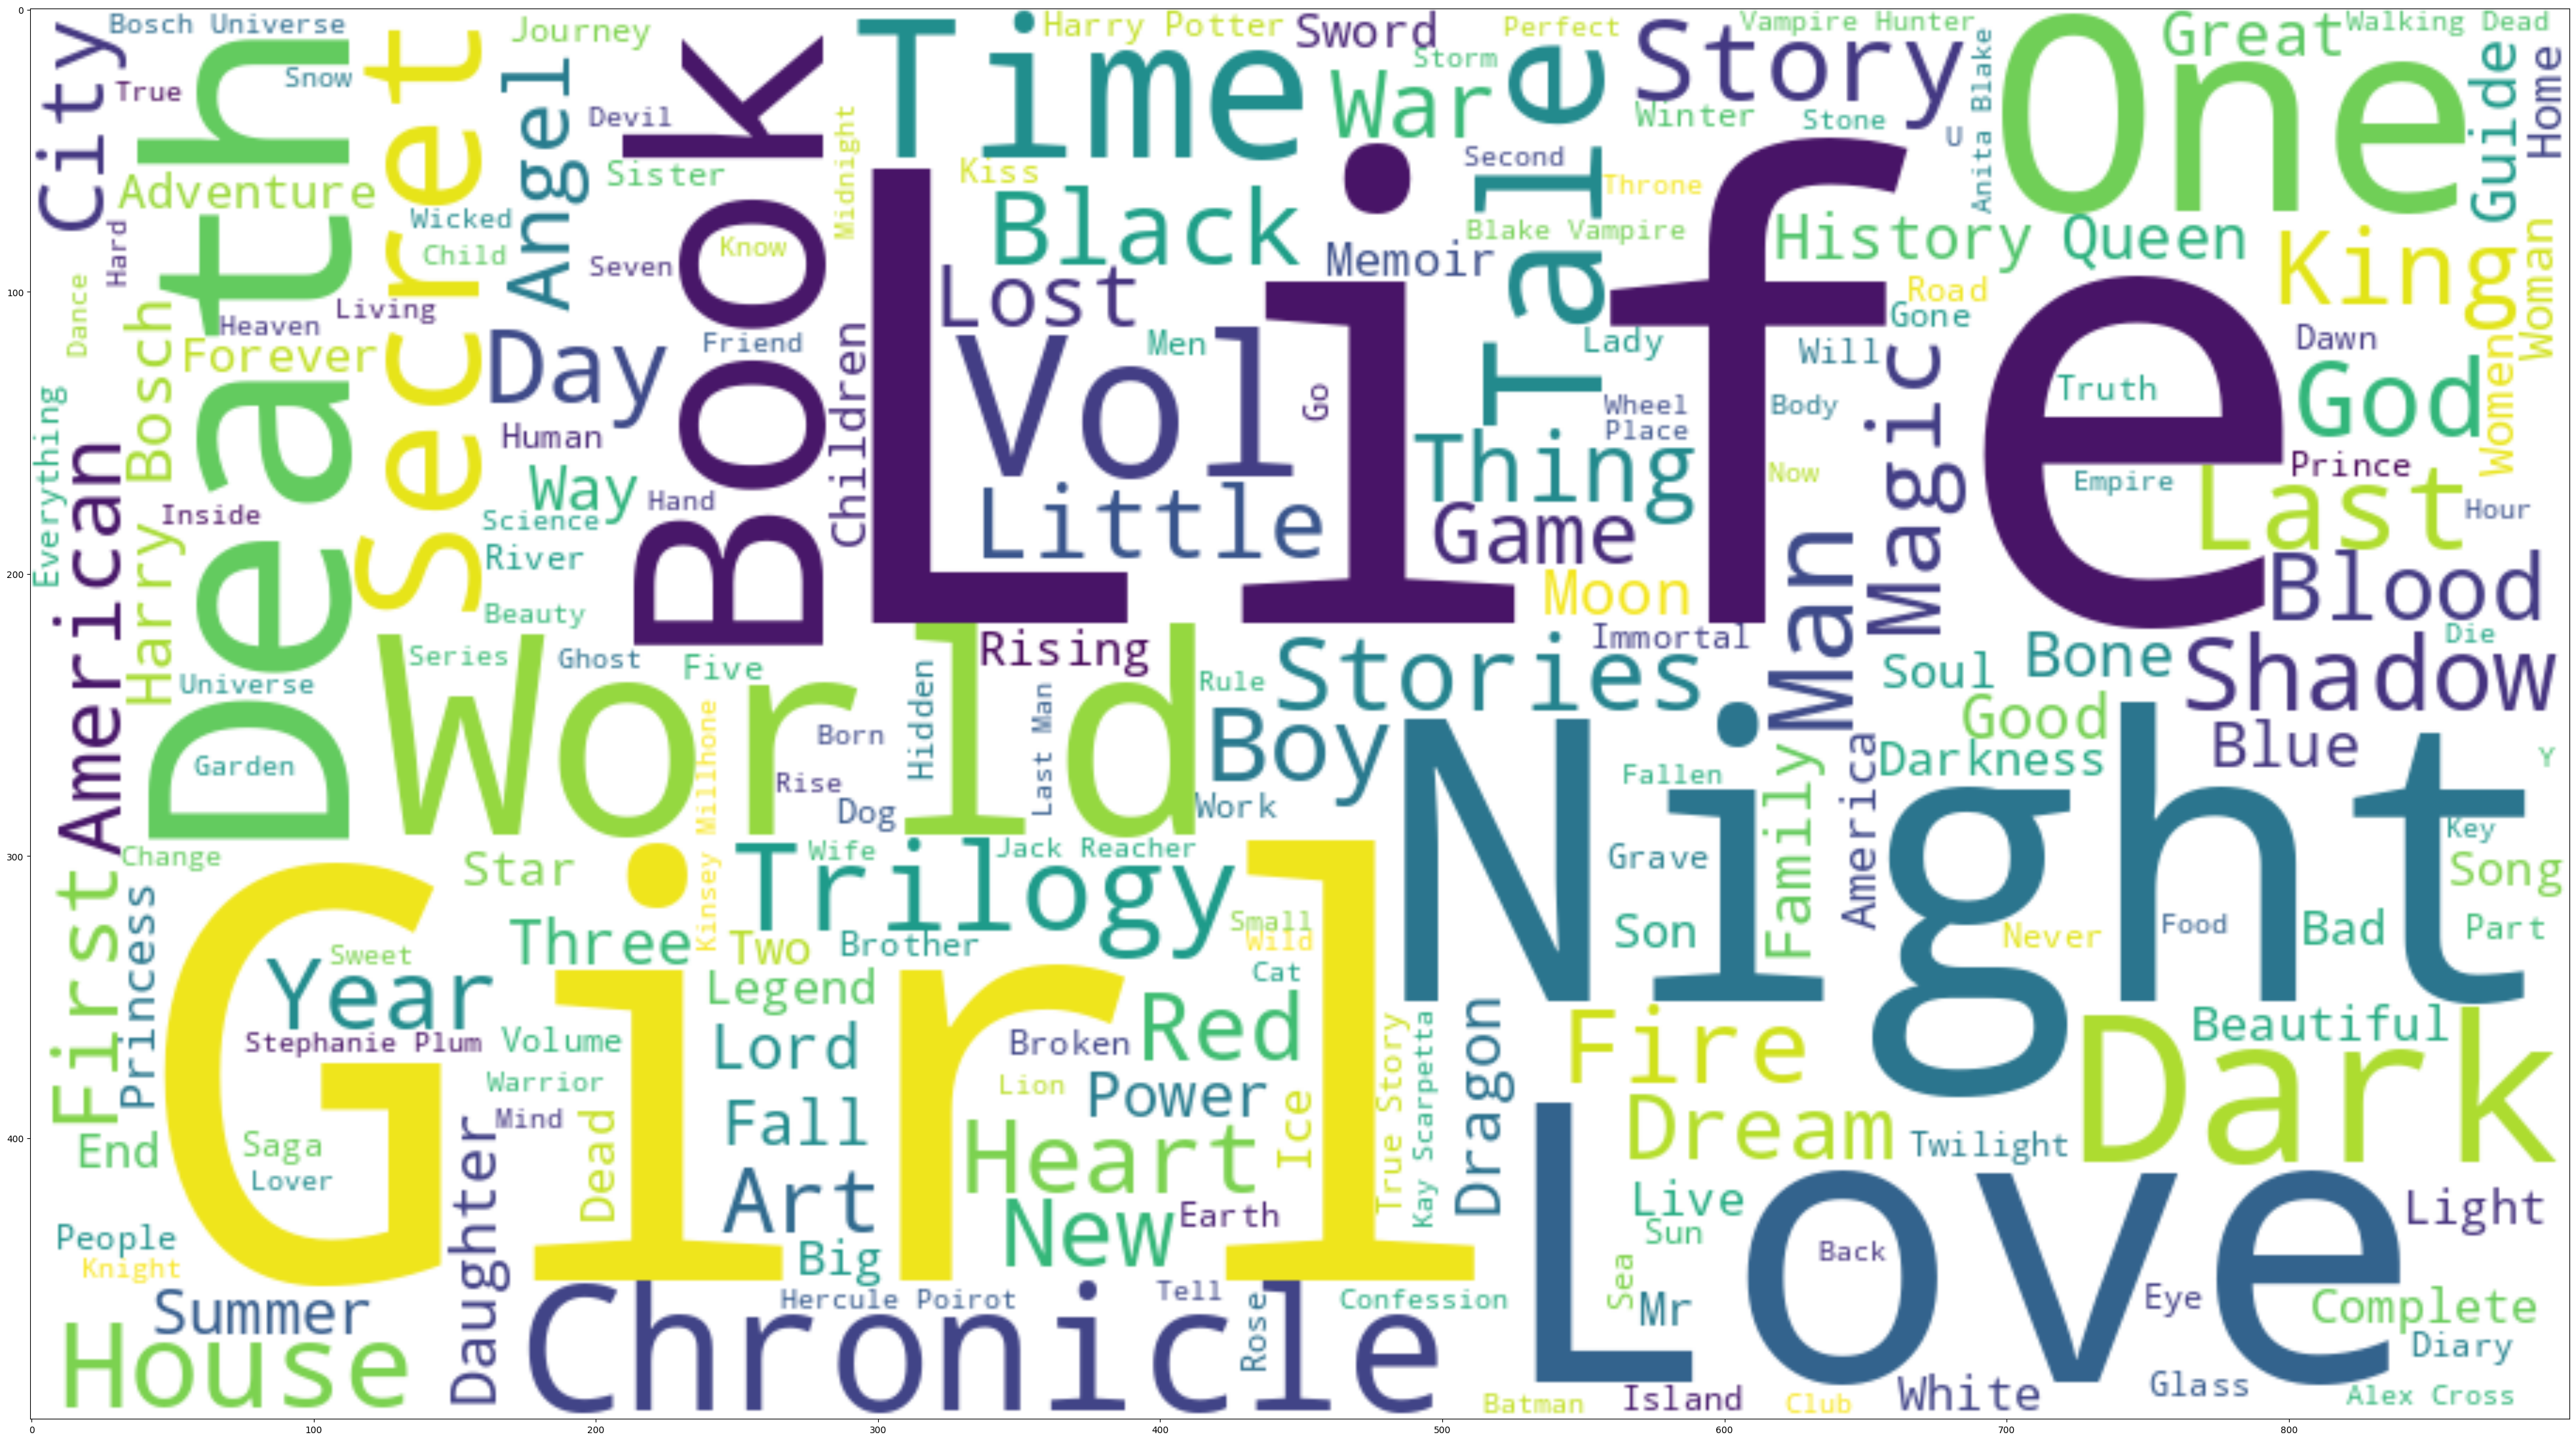

In [37]:
plt.axis('off')
plt.figure(figsize = (50, 40))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()